# **Autocorrelación con archivo de Vectrino Profiler ADV (Nortek)**
---
## *Subcoordinación de Posgrado y Educación Continua.*
### [Instituto Mexicano de Tecnología del Agua](https://www.gob.mx/imta).<br>

<img src="./Datos/Imagenes/Logos.png" style="height: 7em; vertical-align: middle;">

**Alumno: Ing. Omar Ulises Robles Pereyra** <br>
**Tutor: Dr. Ariosto Aguilar Chávez** <br>

[![Open In Colab](./Datos/Imagenes/colab-badge.svg)](https://colab.research.google.com/github/OmarURP/Toolbox_publica/blob/main/00_Autocorrelacion_Vectrino.ipynb)

---

In [ ]:
# Instalación para Google Colab
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    import os
    
    # Si ya existe el directorio, no clonarlo de nuevo
    if not os.path.exists('Toolbox_publica'):
        print("Clonando repositorio completo desde GitHub")
        !git clone https://github.com/OmarURP/Toolbox_publica.git
        print("Repositorio clonado!")
    
    # Cambiar al directorio del repositorio
    os.chdir('Toolbox_publica')
    
    # Instalar el módulo
    print("Instalando ImtaTURB...")
    !pip install -e .
    print("Todo listo!")
else:
    print("Ejecutando localmente")

In [1]:
import ImtaTURB as imta

In [2]:
# Carga de archivos de datos
file = r'Datos/Vectrino/20_cm/A_1.mat'
U, tiempo, parametros = imta.cargar_vectrino(file)

Datos cargados
Archivo: Datos/Vectrino/20_cm/A_1.mat

Componentes de velocidad [u_i]:
  u1: (36001, 10)
  u2: (36001, 10)
  u3: (36001, 10)
  u4: (36001, 10)

Tiempo= (36001,)
  Duración = 360.00 s
  dt = 0.0100 s

Parámetros de configuración de equipo:
  Frecuencia de muestreo: 100.00 Hz
  Velocidad del sonido: 1487.50 m/s


In [3]:
celda = 4 # 0 es celda (50), 9 es celda (59)
# Velocidades instantáneas
u1 = U['u1'][:, celda]
u2 = U['u2'][:, celda]
u3 = U['u3'][:, celda]
#tiempo = tiempo[:, celda]
# Velocidades fluctuantes
u1_fluc, fig1 = imta.fluctuante(u1, tiempo=tiempo, plot=False, titulo='Velocidad u1')
u2_fluc, fig2 = imta.fluctuante(u2, tiempo=tiempo, plot=False, titulo='Velocidad u2')
u3_fluc, fig3 = imta.fluctuante(u3, tiempo=tiempo, plot=False, titulo='Velocidad u3')

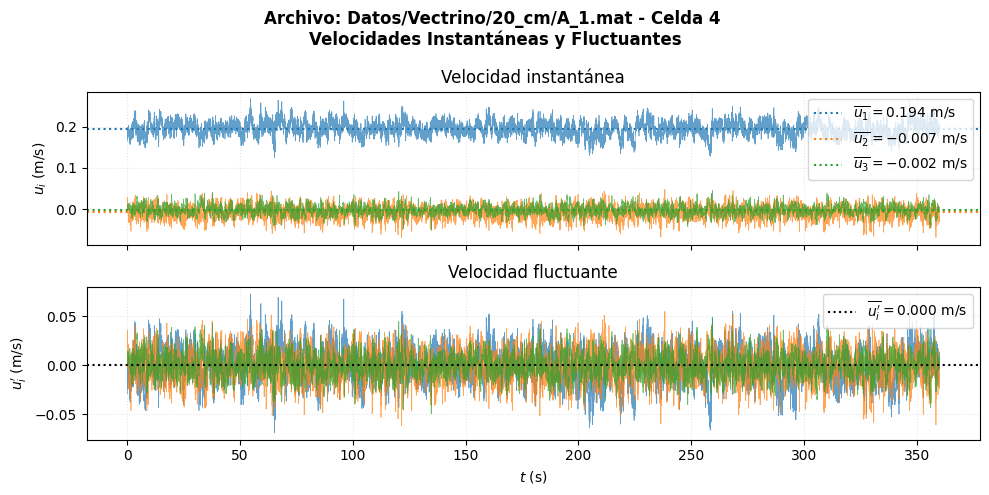

In [4]:
imta.plot_ui(tiempo, u1_fluc, u2_fluc, u3_fluc,
            titulo=f'Archivo: {file} - Celda {celda} \nVelocidades Instantáneas y Fluctuantes',
            etiquetas=('u_1', 'u_2', 'u_3'));

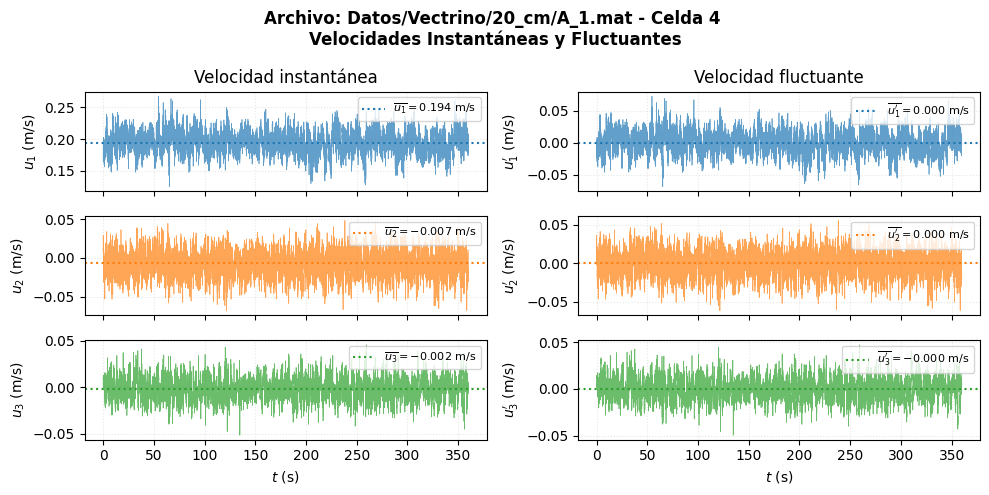

In [5]:
imta.plot_ui_grid(tiempo, u1_fluc, u2_fluc, u3_fluc,
            titulo=f'Archivo: {file} - Celda {celda} \nVelocidades Instantáneas y Fluctuantes',
            etiquetas=('u_1', 'u_2', 'u_3'));

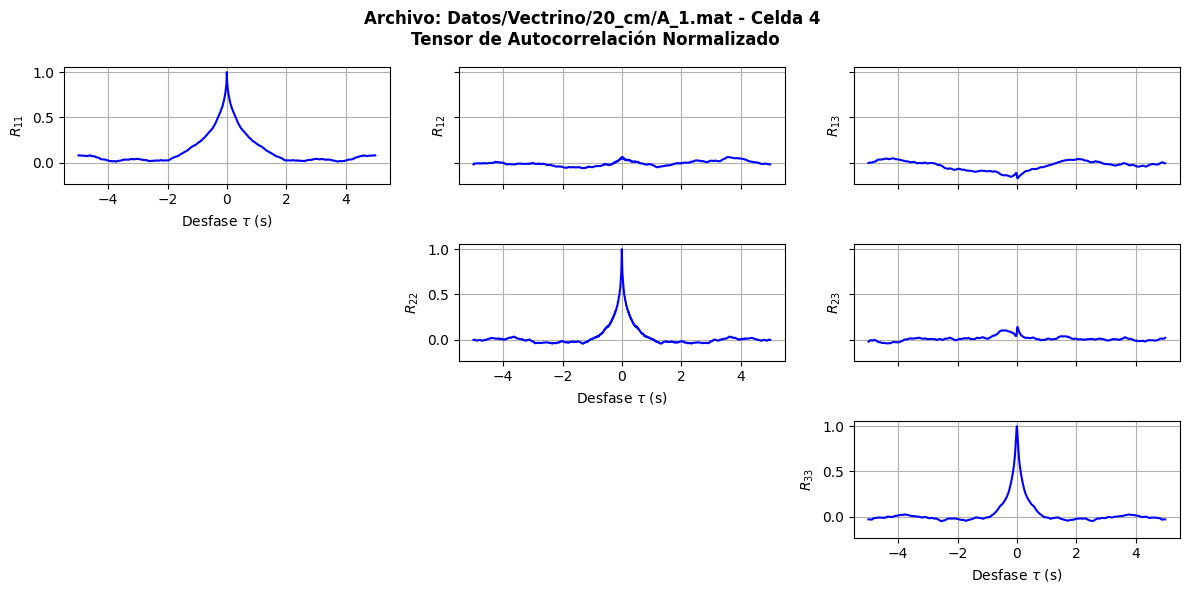

In [6]:
frecuencia = parametros['frec'].item()  # Valor de frecuencia de muestreo (Hz)
tensor_r, lags_s, fig = imta.autocorrelacion_norm(u1_fluc['fluc'],
                                                  u2_fluc['fluc'],
                                                  u3_fluc['fluc'],
                                                  frecuencia,
                                                  plot=True,
                                                  titulo=f'Archivo: {file} - Celda {celda} \nTensor de Autocorrelación Normalizado',
                                                  max_lag_seg=5.0)

Componente r11: Frecuencia máxima = 0.043 Hz, Energía = 1.576e+05
Componente r12: Frecuencia máxima = 0.042 Hz, Energía = 4.311e+04
Componente r13: Frecuencia máxima = 0.043 Hz, Energía = 6.206e+04
Componente r22: Frecuencia máxima = 0.299 Hz, Energía = 5.118e+04
Componente r23: Frecuencia máxima = 0.232 Hz, Energía = 3.386e+04
Componente r33: Frecuencia máxima = 0.232 Hz, Energía = 8.726e+04


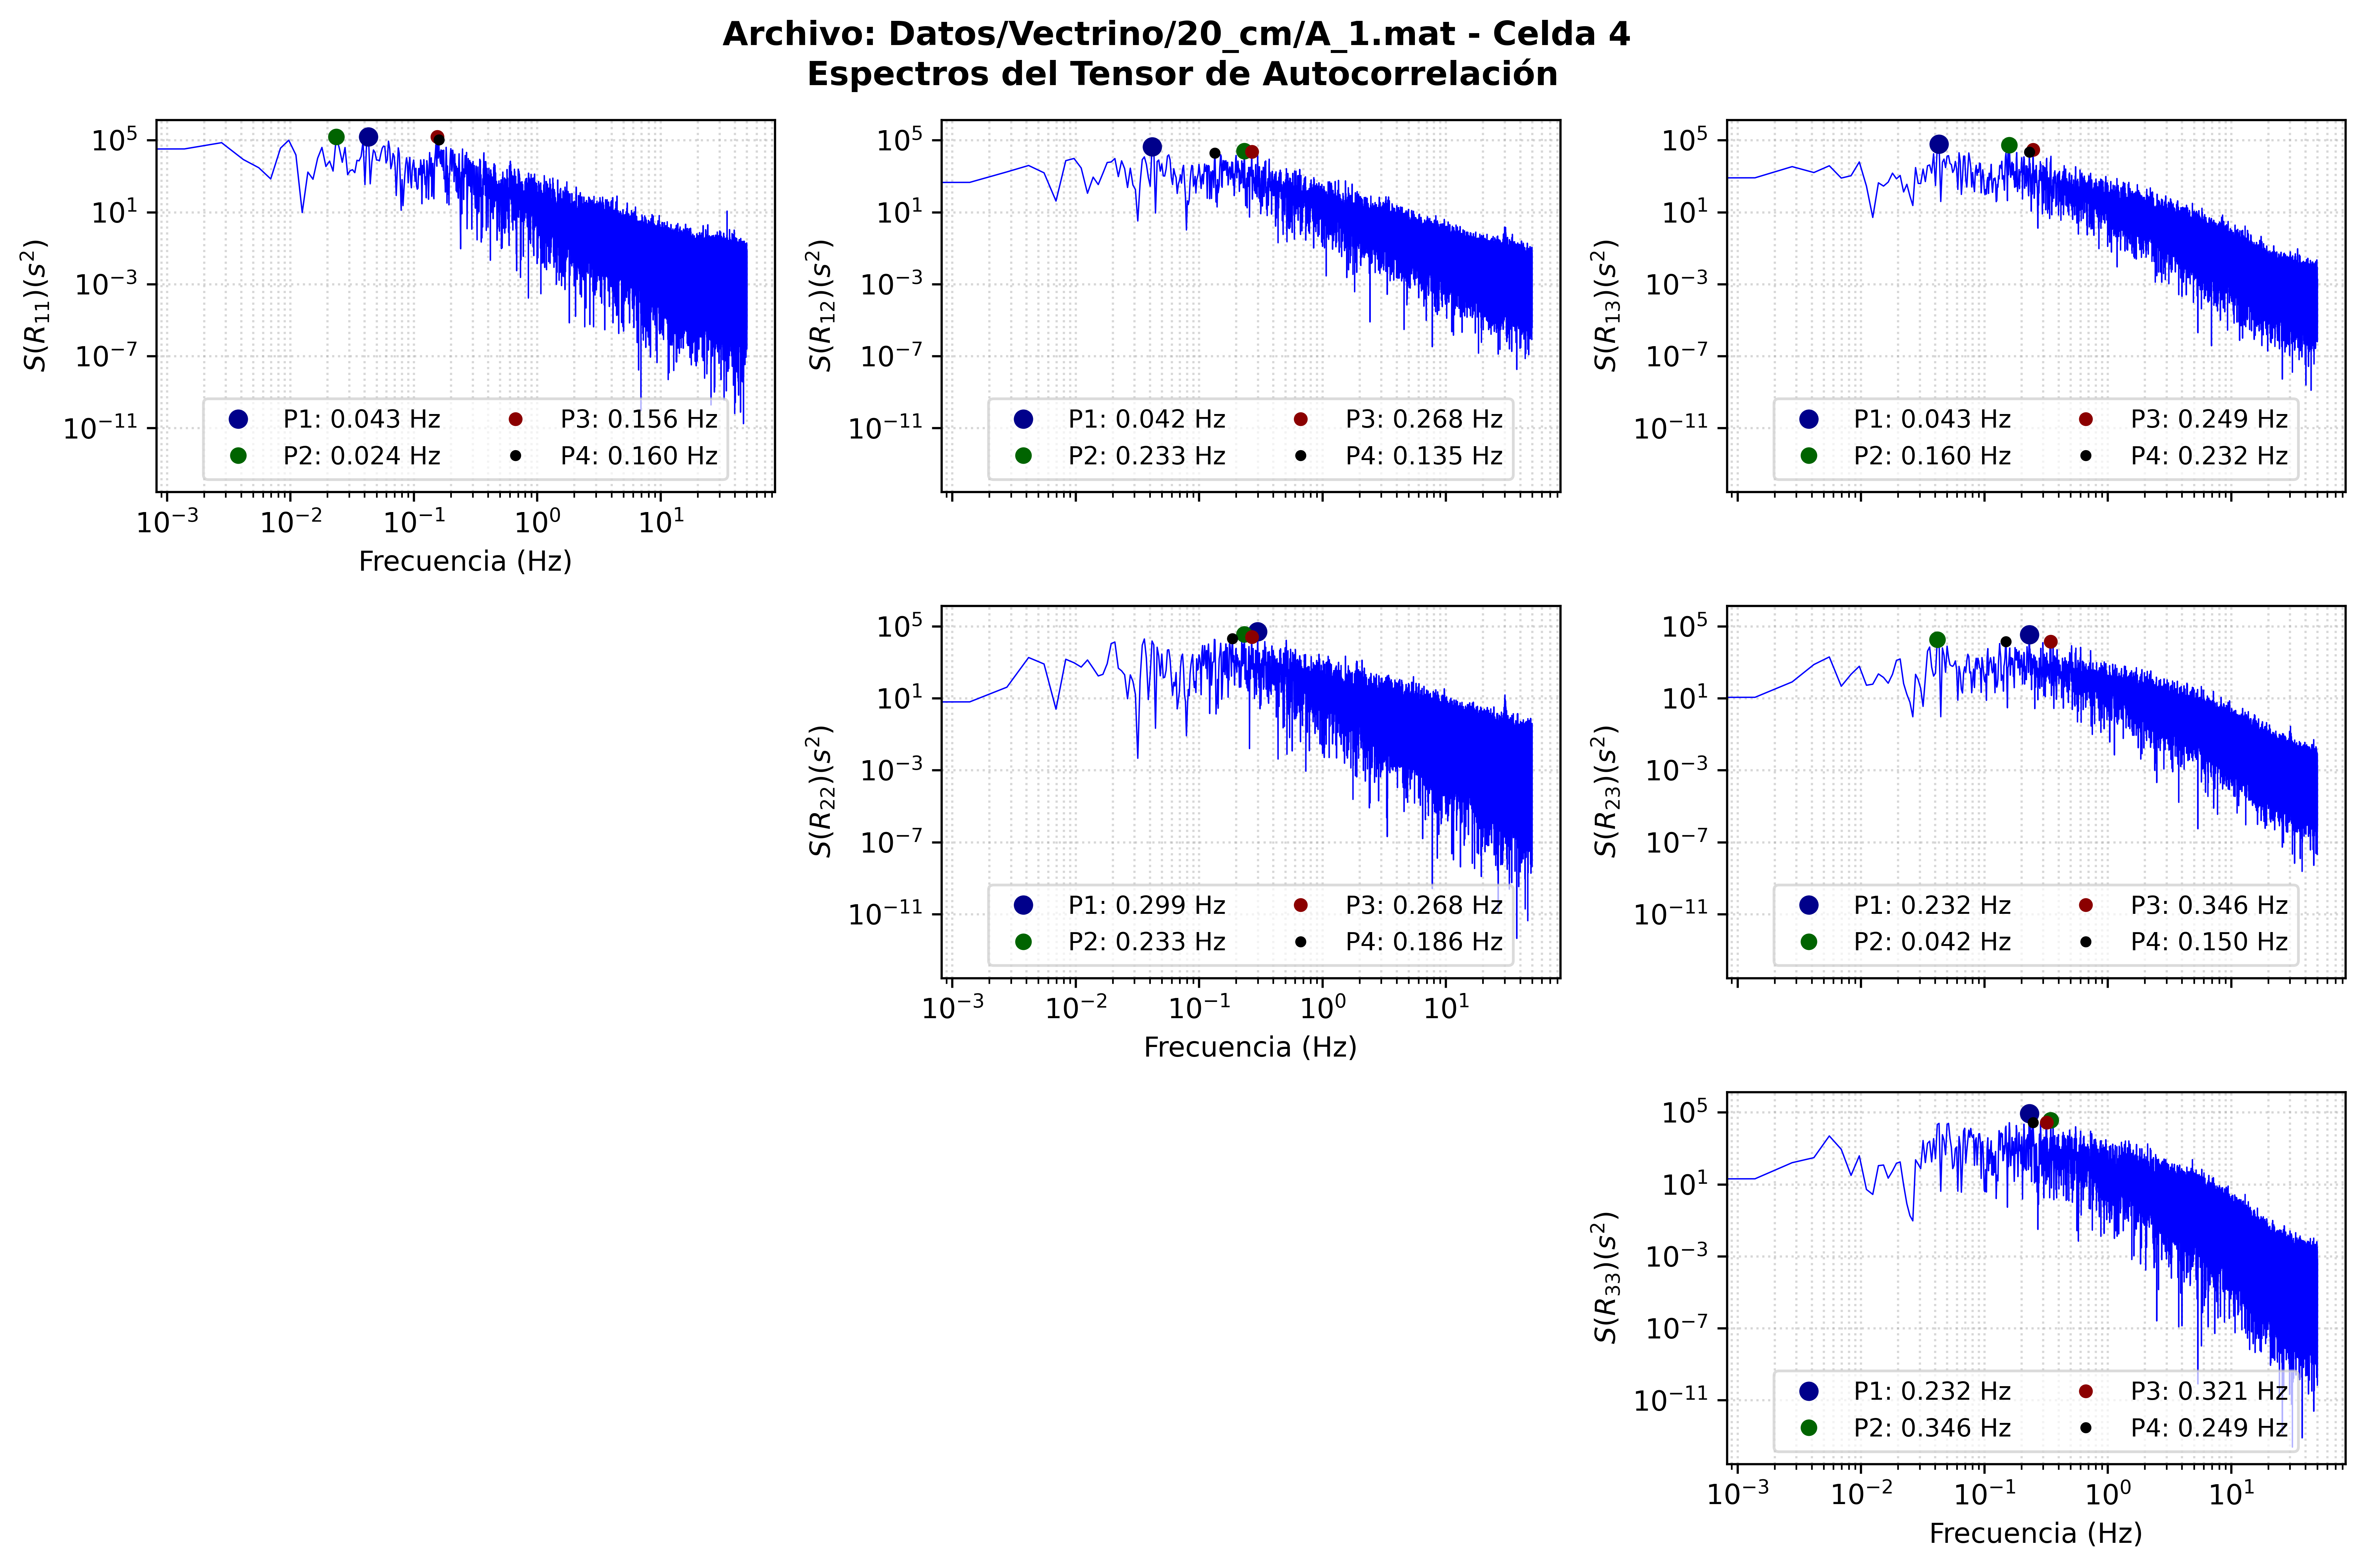

In [7]:
frecuencias, espectro, fig = imta.espectros_tensor(tensor_r,
                                             frecuencia,
                                             titulo=f'Archivo: {file} - Celda {celda} \nEspectros del Tensor de Autocorrelación',
                                             plot=True)